<h2>🧭 Why Are We Doing EDA in This Project?</h2>

We’re doing Exploratory Data Analysis (EDA) to:

- Understand the structure, quality, and completeness of our football data

- Identify patterns, trends, and relationships between player stats

- Spot anomalies or outliers that may affect results

- Validate assumptions and guide feature selection

- Prepare clean, meaningful data for dashboards and predictive models

👉 EDA is essential to build a strong foundation before moving to visualization and machine learning.








In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for pretty visuals
sns.set(style="whitegrid")


<h3>Players</3>

In [3]:
import os

# Set the working directory
os.chdir("C:/Users/bahri/Desktop/Football_performance_analysis")

# Verify
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\bahri\Desktop\Football_performance_analysis


In [5]:
# Load players data
players_df = pd.read_excel("data/cleaned/sofifa/sofifa_players_cleaned.xlsx")


In [6]:
# Basic inspection
print(players_df.shape)
print(players_df.info())
print(players_df.describe())

(18017, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18017 entries, 0 to 18016
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      18017 non-null  object 
 1   age                       18017 non-null  int64  
 2   weight                    18017 non-null  int64  
 3   height                    18017 non-null  int64  
 4   positions                 18017 non-null  object 
 5   wage_k                    18017 non-null  int64  
 6   value_m                   18017 non-null  float64
 7   release_clause_m          18017 non-null  float64
 8   overall_rating            18017 non-null  int64  
 9   agility                   18017 non-null  int64  
 10  balance                   18017 non-null  int64  
 11  ballcontrol               18017 non-null  int64  
 12  body_type                 18017 non-null  object 
 13  composure                 18017 non-null  int64  

In [10]:
# Check missing values
print(players_df.isnull().sum())

name                        0
age                         0
weight                      0
height                      0
positions                   0
wage_k                      0
value_m                     0
release_clause_m            0
overall_rating              0
agility                     0
balance                     0
ballcontrol                 0
body_type                   0
composure                   0
crossing                    0
curve                       0
dribbling                   0
fkaccuracy                  0
finishing                   0
gkdiving                    0
gkhandling                  0
gkkicking                   0
gkpositioning               0
gkreflexes                  0
headingaccuracy             0
interceptions               0
international_reputation    0
jumping                     0
longpassing                 0
longshots                   0
marking                     0
penalties                   0
positioning                 0
potential 

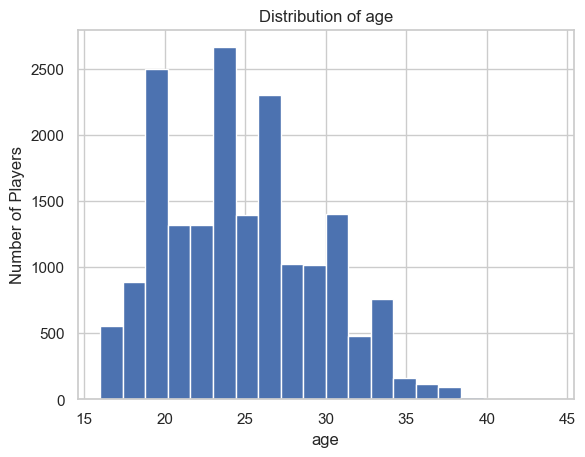

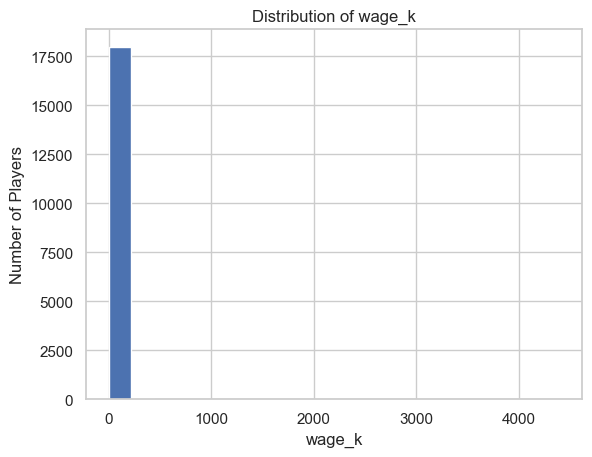

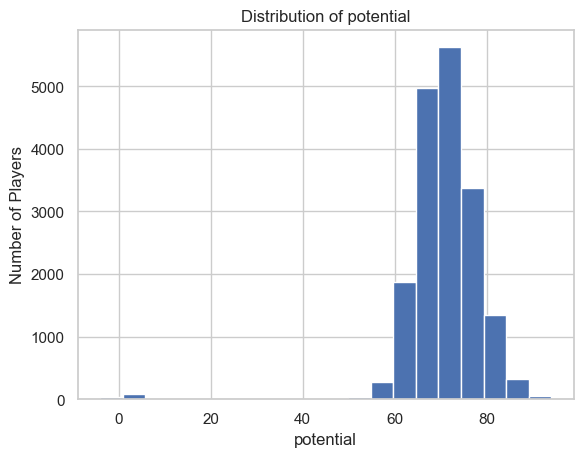

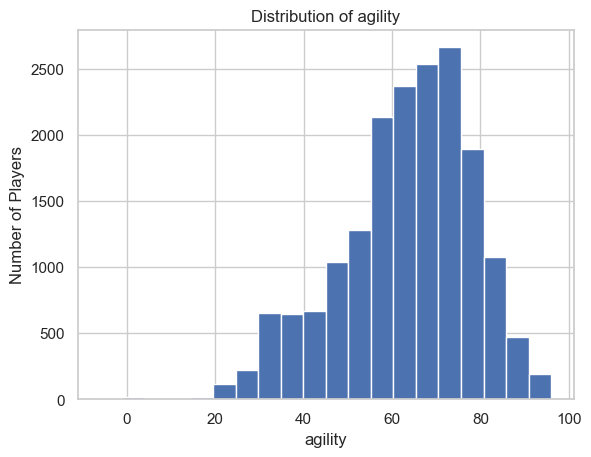

In [9]:
# Distribution of key performance metrics
metrics = ['age', 'wage_k', 'potential', 'ball_control', 'agility']

for metric in metrics:
    if metric in players_df.columns:
        players_df[metric].dropna().hist(bins=20)
        plt.title(f"Distribution of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Number of Players")
        plt.show()

In [65]:
# Top scorers
top_scorers = players_df[['name', 'team', 'league', 'goals']].sort_values(by='goals', ascending=False).head(10)
print(top_scorers)

                    name                    team          league  goals
485        Kylian Mbappé             Real Madrid         La_liga     31
1613       Mohamed Salah               Liverpool  Premier_league     29
500   Robert Lewandowski               Barcelona         La_liga     27
3             Harry Kane       FC Bayern München      Bundesliga     26
2182       Mateo Retegui                Atalanta         Serie_a     25
1636      Alexander Isak        Newcastle United  Premier_league     23
1640      Erling Haaland         Manchester City  Premier_league     22
1074     Ousmane Dembélé     Paris Saint-Germain         Ligue_1     21
40         Patrik Schick     Bayer 04 Leverkusen      Bundesliga     21
1077     Mason Greenwood  Olympique de Marseille         Ligue_1     21


<h3>Teams</h3>

In [66]:
teams_df = pd.read_excel("data/cleaned/sofascore/teams_standings.xlsx")

In [68]:
# Basic info
print(teams_df.shape)
print(teams_df.info())
print(teams_df.describe())
print(teams_df.isnull().sum())

(652, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      652 non-null    int64 
 1   league  652 non-null    object
 2   team    652 non-null    object
 3   p       652 non-null    int64 
 4   w       652 non-null    int64 
 5   d       652 non-null    int64 
 6   l       652 non-null    int64 
 7   diff    652 non-null    int64 
 8   goals   652 non-null    object
 9   pts     652 non-null    int64 
 10  last_5  652 non-null    object
dtypes: int64(7), object(4)
memory usage: 56.2+ KB
None
              id           p           w           d           l        diff  \
count  652.00000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean   326.50000   20.993865    8.001534    4.990798    8.001534    0.000000   
std    188.36047   14.484908    6.649555    4.443526    6.856775   18.269782   
min      1.00000    8.000000    0.000000 

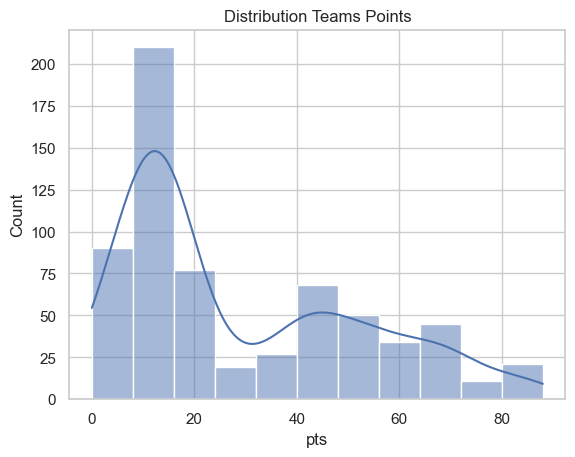

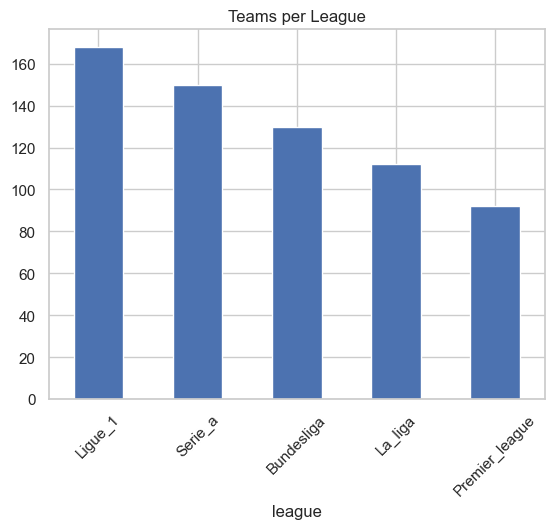

In [70]:
# Example: distribution of average player age per team
if 'pts' in teams_df.columns:
    sns.histplot(teams_df['pts'].dropna(), kde=True)
    plt.title("Distribution Teams Points")
    plt.show()
    
# Count of teams per league (if league info exists)
if 'league' in teams_df.columns:
    teams_df['league'].value_counts().plot(kind='bar')
    plt.title("Teams per League")
    plt.xticks(rotation=45)
    plt.show()


<h3>Leagues</h3>

In [71]:
leagues_df = pd.read_excel("data/cleaned/sofascore/Big5.xlsx")

In [72]:
leagues_df.columns = leagues_df.columns.str.strip().str.lower().str.replace(" ", "_")


In [73]:
# Explore
print(leagues_df.shape)
print(leagues_df.info())
print(leagues_df.describe())
print(leagues_df.isnull().sum())

(5, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   picture                    5 non-null      object 
 1   rank                       5 non-null      int64  
 2   description                5 non-null      object 
 3   league                     5 non-null      object 
 4   country                    5 non-null      object 
 5   goals                      5 non-null      int64  
 6   avg_goals                  5 non-null      float64
 7   home_team_wins_percentage  5 non-null      int64  
 8   away_team_wins_percentage  5 non-null      int64  
 9   draws_percentage           5 non-null      int64  
 10  y_cards                    5 non-null      float64
 11  r_cards                    5 non-null      float64
 12  nb_of_competitors          5 non-null      int64  
 13  division_level             5 non-null      int

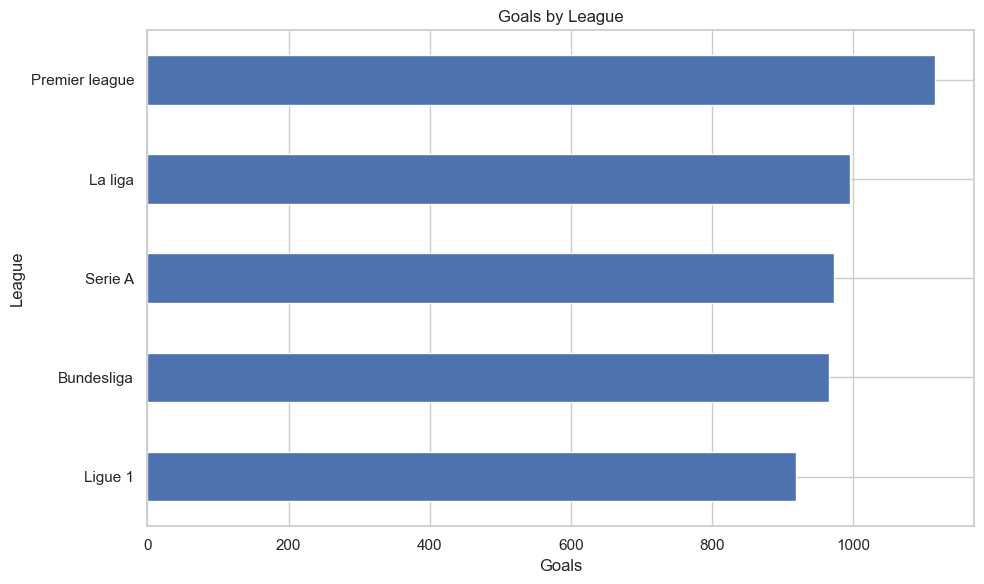

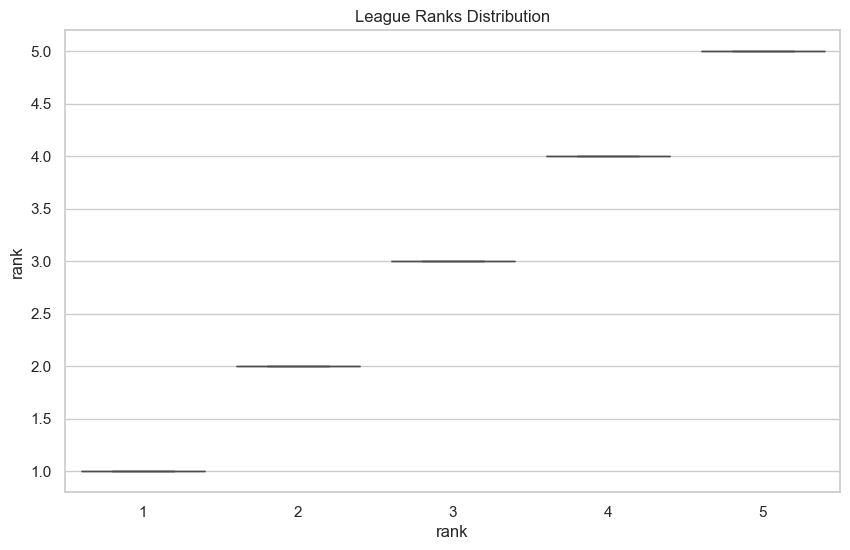

In [106]:
# Plot goals on x-axis, league names on y-axis
leagues_df.sort_values('goals', ascending=True).plot(
    kind='barh',
    x='league',
    y='goals',
    figsize=(10, 6),
    legend=False
)

plt.xlabel("Goals")
plt.ylabel("League")
plt.title("Goals by League")
plt.tight_layout()
plt.show()


if 'rank' in leagues_df.columns:
    sns.boxplot(x='rank', y='rank', data=leagues_df)
    plt.title("League Ranks Distribution")
    plt.show()

<h3>Merge datasets</h3>

In [ ]:
# Merge players with teams on both 'league' and 'team'
#merged_df = pd.merge(players_df, teams_df, on=['league', 'team'], how='left')

# Save the merged dataframe
#merged_df.to_excel("merged_football_data.xlsx", index=False)


In [90]:
merged_df = pd.read_excel("data/cleaned/sofascore/players_teams.xlsx")
print(merged_df.shape)
print(merged_df.info())
print(merged_df.describe())
print(merged_df.isnull().sum())

(2773, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2773 non-null   int64  
 1   Picture              2773 non-null   object 
 2   League               2773 non-null   object 
 3   Team                 2773 non-null   object 
 4   Name                 2773 non-null   object 
 5   Age                  2773 non-null   int64  
 6   Position             2773 non-null   object 
 7   Overall_rating       2773 non-null   int64  
 8   p_goals              2773 non-null   int64  
 9   p_matches_played     2773 non-null   int64  
 10  Assists              2773 non-null   int64  
 11  Expected_goals_(xG)  2773 non-null   float64
 12  Successful_dribbles  2773 non-null   int64  
 13  Tackles              2773 non-null   int64  
 14  Accurate_passes_%    2773 non-null   float64
 15  T_matches_played     2772 n

Cleaning the merged dataset

In [ ]:
import pandas as pd
import unicodedata

# === Helper functions ===

def remove_accents(text):
    if isinstance(text, str):
        text = unicodedata.normalize('NFKD', text)
        return ''.join(c for c in text if not unicodedata.combining(c))
    return text

def clean_string(value):
    if isinstance(value, str):
        value = remove_accents(value)
        value = value.strip().lower().replace(" ", "_")
    return value

def clean_dataframe(df):
    # Clean column names
    df.columns = [clean_string(col) for col in df.columns]
    
    # Clean non-numeric columns (object type)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(clean_string)
        
    return df

# === Load and clean your Excel file ===
file_path = "data/cleaned/sofascore/players_teams.xlsx"
df = pd.read_excel(file_path)

# Clean the DataFrame
df_cleaned = clean_dataframe(df)

# Save cleaned version
df_cleaned.to_excel(file_path, index=False)
print("✅ Data cleaned and saved.")

✅ Data cleaned and saved.


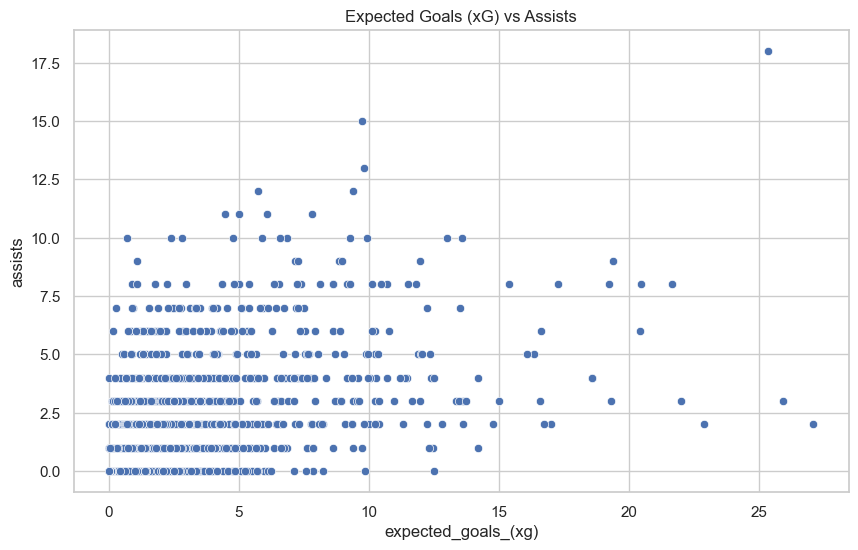

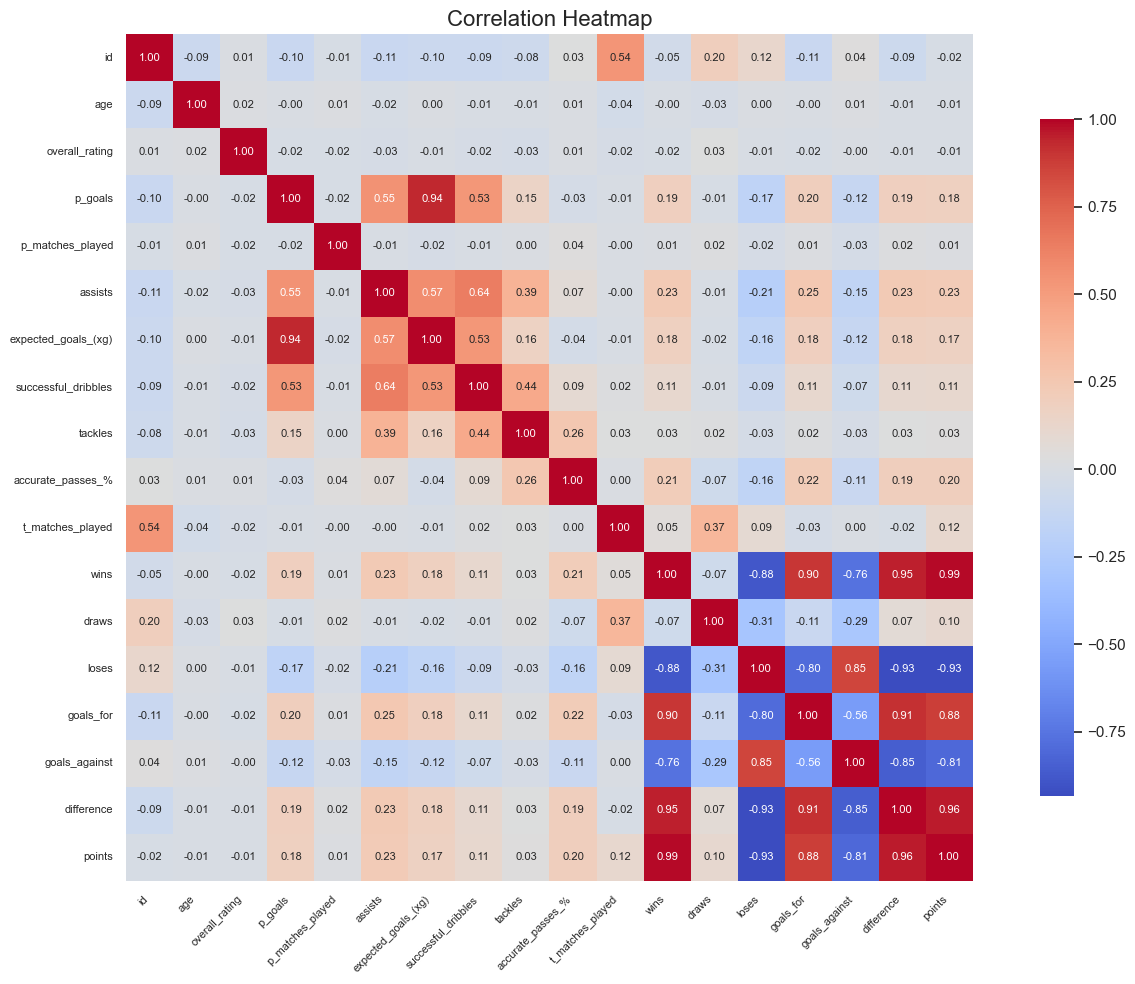

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assists vs xG
sns.scatterplot(data=merged_df, x="expected_goals_(xg)", y="assists")
plt.title("Expected Goals (xG) vs Assists")
plt.show()

# Compute correlation matrix
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

# Plot with improved settings
plt.figure(figsize=(14, 10))  # Larger figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

🔴 Strong Positive Correlations (Close to +1):

wins vs points: 0.99 → More wins lead directly to more points.

difference vs points: 0.96 → The goal difference is a strong predictor of team performance.

goals_for vs points: 0.91 → Teams that score more often gain more points.

assists vs p_goals: 0.55 → Players who assist often also score frequently.

🔵 Strong Negative Correlations (Close to -1):

losses vs points: -0.93 → More losses mean fewer points.

goals_against vs wins: -0.85 → Teams conceding more goals tend to win less.

losses vs difference: -0.93 → Teams with more losses have worse goal differences.

⚪ Weak or No Correlation (Close to 0):

age vs everything: Mostly around 0.00 to -0.01 → Player age has little impact on most performance metrics in this dataset.

id vs any feature: Irrelevant, just a unique identifier.